In [28]:
import os
import numpy as np
from py3helpers.aws import AwsS3
from rrna_analysis.plot_experiment_table import plot_acc_heatmap_for_experiment
from rrna_analysis.multiple_model_accuracy import plot_accuracy_vs_delta_and_accuracy_over_time, preprocess_accuracy_csv
from rrna_analysis.kmer_pos_mapping import KmerPosMapping
import pandas as pd
from scipy.stats import norm, entropy
from itertools import combinations
import matplotlib
import matplotlib.pyplot as plt


In [2]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [3]:
mods_csv = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/mod_file.csv"
reference = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/yeast_25S_18S.fa"
alt_c_positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/alt_canonical_distribution/yeast_18S_25S_variants.positions"
# positions = "/Users/andrewbailey/CLionProjects/rrna_analysis/reference/mod_files/yeast_18S_25S_variants.positions"
kpm = KmerPosMapping(reference, alt_c_positions, mods_csv)


In [19]:
def plot_starting_acc_vs_end_accuracy(experiments, experiment_names, round_n, key, kmer_pos_mapping, figure_path=None, threshold=0.3):
#     f, panel1 = plt.subplots(figsize=(16, 14))
    f, panel1 = plt.subplots(figsize=(5, 5))

    panel1.set_title(f'Starting {key} vs Ending {key}')
    panel1.set_xlabel(f"Starting {key}")
    panel1.set_ylabel(f"Ending {key}")
    for experiment, name in zip(experiments, experiment_names):
        end_df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/{round_n}_per_position_data_0.5.csv"), kmer_pos_mapping.subset_mod_data)
        start_df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/1_per_position_data_0.5.csv"), kmer_pos_mapping.subset_mod_data)

        if end_df.isnull().values.any() or start_df.isnull().values.any() :
            print(f"Warning, {name} has missing values")
            end_df = end_df.dropna()
            start_df = start_df.dropna()
        
        frac_threshold = .9
#         panel1.scatter(start_df[start_df["fraction"] >= frac_threshold][key], end_df[end_df["fraction"] >= frac_threshold][key], label=f"Below 0.9 {name}")
#         panel1.scatter(start_df[start_df["fraction"] < frac_threshold][key], end_df[end_df["fraction"] < frac_threshold][key], label=f"Above 0.9 {name}")
        panel1.scatter(start_df[key], end_df[key], label=f"{name}")

        text_df = end_df[(start_df[key]-end_df[key]) > threshold]
        for i, x in text_df.iterrows():
            panel1.text(start_df.loc[i][key], end_df.loc[i][key], f"{x.contig} {x.reference_index}")
#         m, b = np.polyfit(df["fraction"], df["recall"], 1)
#         panel1.plot(linspace, m * linspace + b,
#                     label=f"{name}: slope={round(m, 4)} \n intercept={round(b, 4)}")
    min_linspace = np.min([np.min(start_df[key]), np.min(end_df[key])])
    max_linspace = np.max([np.max(start_df[key]), np.max(end_df[key])])
    linspace = np.linspace(min_linspace,max_linspace,100)

    panel1.plot(linspace, linspace, '-r', linewidth=2, label='Perfect Match')
    panel1.legend()
    if figure_path is not None:
#         assert not os.path.exists(figure_path), "Save fig path does exist: {}".format(figure_path)
        plt.savefig(figure_path)
    else:
        plt.show()



In [20]:

_ivt_and_native="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/ivt_and_native_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers_ivt_and_native_training"
_30_rounds="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_false_MIN_SD_0"
_native_all_kmers="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/only_covered_kmers_training/train_500_test_500_prob_0.5_em_iterations_30_all_kmers"
_unsup_60="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_60_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_70="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_70_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_80_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_true"
_unsup_90_no_ivt="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/unsupervised/fraction_sweep/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_unsup_alt_can_90="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false"
_alt_can="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false"
_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
# round 5 from alt_c used for continuing training
_unsup_alt_can_80="/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.80_em_iterations_30_gaussian_true_FREQ_THRESHOLD_90_USE_IVT_TRAINING_true_unsupervised_true_all_kmers_false_alt_c_6mer"
_median_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/supervised/gaussian_distribution_testing/train_500_test_500_prob_0.5_em_iterations_30_USE_MEDIAN_true_MIN_SD_0/"
_mrna_trained_30 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/trained_mRNA_model/standard/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_false_unsupervised_false_all_kmers_false"
_alt_can_60 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian_60/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_alt_c_6mer"
_alt_can_all_k = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/alt_canonical/gaussian/train_500_test_500_prob_0.5_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_true_alt_c_6mer"
_median_small_07 = "/Users/andrewbailey/CLionProjects/rrna_analysis/notebooks/rrna_data/rrna_kube_testing/small_5mer/test/train_500_test_500_prob_0.7_em_iterations_30_gaussian_true_FREQ_THRESHOLD_0_USE_IVT_TRAINING_true_unsupervised_false_all_kmers_false_small_model_5mer_use_median_true"



In [21]:
key = "accuracy"
# key = "precision"
# key = "negative_predictive_value"
# key = "recall"
# key = "specificity"
# key = "positive_likelihood_ratio"
# key = "negative_likelihood_ratio"
# key = "diagnostic_odds_ratio"
# key = "f1_score"
# key = "prevalence"
# key = "aucroc"
# key = "avg_precision"
# key = "brier_score"


In [24]:
figure_path = "/Users/andrewbailey/CLionProjects/rrna_analysis/figures/beginning_vs_end_accuracy/start_vs_end_accuracy_median_small_07.svg"       
# figure_path = None
round_n = 30
# experiments = [_alt_can, _unsup_alt_can_90, _unsup_alt_can_80]
# experiment_names = ["alt_can", "unsup_alt_can_90", "unsup_alt_can_0.80_threshold"]
experiments = [_median_small_07]
experiment_names = ["_median_small_07"]
threshold = 0.1

Warning, _median_small_07 has missing values


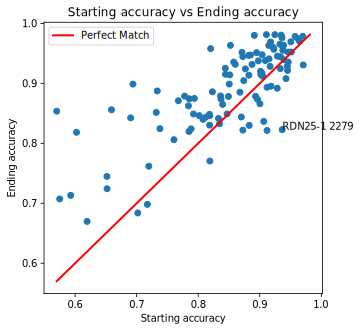

In [29]:
from IPython.display import set_matplotlib_formats
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

matplotlib.use('SVG')
plt.rcParams['svg.fonttype'] = 'none'
plot_starting_acc_vs_end_accuracy(experiments, experiment_names, round_n, key, kpm, threshold=threshold, figure_path=figure_path)


In [68]:
round_n = 30
experiment = _median_small_07
key = "accuracy"
end_df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/{round_n}_per_position_data_0.5.csv"), kpm.subset_mod_data)
start_df = preprocess_accuracy_csv(os.path.join(experiment, f"training_accuracy_csvs/1_per_position_data_0.5.csv"), kpm.subset_mod_data)


In [13]:
end_df["diff"] = end_df[key] - start_df[key]

In [14]:
end_df[end_df["diff"] < -.1]

,contig,reference_index,strand,variants,accuracy,precision,negative_predictive_value,recall,specificity,positive_likelihood_ratio,negative_likelihood_ratio,diagnostic_odds_ratio,f1_score,prevalence,aucroc,avg_precision,brier_score,delta1,delta2,delta,in_2prime,in_pseudo,in_unknown,percent,fraction,recall-frac,diff
76,RDN25-1,2279,+,ab,0.8228,0.8889,0.7742,0.743,0.9047,7.7927,0.1283,60.7255,0.8094,0.5066,0.8721,0.8804,0.1495,1.0,2.0,1.0,False,False,False,100,1.0,-0.257,-0.1136
